# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [3]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [1]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02', '03','04','05','06']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [2]:
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [3]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


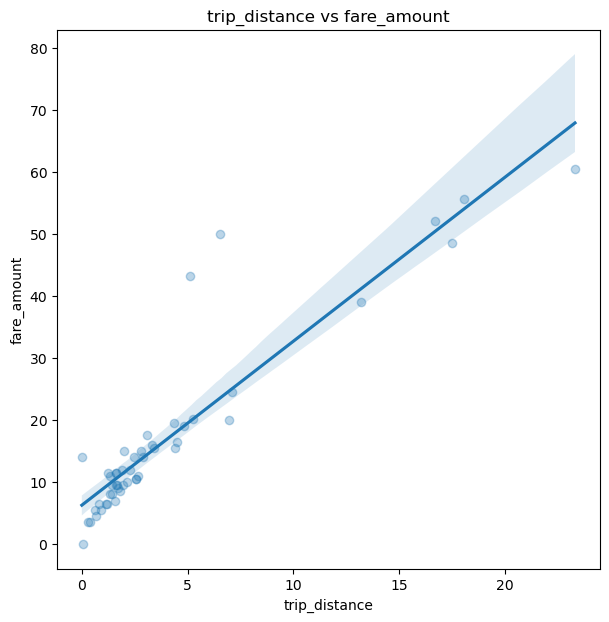

In [43]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)


### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

In [30]:
#Makes summary of yellow dataset dataset: 
df_yellow.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,1.981758e+07,1.914568e+07,1.981758e+07,1.914568e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.914568e+07,1.914568e+07
mean,1.713360e+00,1.396736e+00,5.945396e+00,1.406460e+00,1.650115e+02,1.628957e+02,1.183228e+00,1.424568e+01,1.018474e+00,4.901798e-01,2.662276e+00,4.954867e-01,2.965172e-01,2.090277e+01,2.291212e+00,8.946397e-02
std,4.948604e-01,9.723353e-01,6.063143e+02,5.723299e+00,6.550294e+01,7.029948e+01,5.026529e-01,1.278727e+02,1.248377e+00,8.713217e-02,3.183075e+00,1.969530e+00,4.518930e-02,1.282713e+02,7.329083e-01,3.248978e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-2.564000e+03,-7.000000e+00,-5.000000e-01,-4.100000e+02,-8.300000e+01,-3.000000e-01,-2.567800e+03,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.100000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.200000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.870000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.000000e+01,5.000000e-01,5.000000e-01,2.150000e+00,0.000000e+00,3.000000e-01,1.551000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.460000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.550000e+01,2.500000e+00,5.000000e-01,3.260000e+00,0.000000e+00,3.000000e-01,2.225000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,3.571927e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.710000e+01,1.400160e+03,9.118700e+02,3.000000e-01,4.010956e+05,2.750000e+00,1.250000e+00


In [31]:
#Make summary of green dataset
df_green.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,437176.000000,386760.000000,437176.000000,437176.000000,386760.000000,437176.000000,437176.000000,437176.000000,437176.000000,437176.000000,437176.000000,437176.000000,437176.000000,386760.000000,386754.00000,386760.000000
mean,1.855706,1.203242,99.918934,137.605738,1.278917,92.988147,14.755748,0.347963,0.419242,1.949094,0.243981,0.297385,18.671302,1.381872,1.04266,0.729586
std,0.351427,0.947528,64.027211,76.835996,0.908927,3311.892283,13.026730,0.653121,0.187675,3.271234,1.331436,0.035236,15.027967,0.504943,0.20209,1.214278
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-165.000000,-4.500000,-0.500000,-2.080000,-6.550000,-0.300000,-165.300000,1.000000,1.00000,-2.750000
25%,2.000000,1.000000,65.000000,74.000000,1.000000,1.140000,7.500000,0.000000,0.500000,0.000000,0.000000,0.300000,9.960000,1.000000,1.00000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,2.000000,11.000000,0.000000,0.500000,1.330000,0.000000,0.300000,14.750000,1.000000,1.00000,0.000000
75%,2.000000,1.000000,130.000000,216.000000,1.000000,3.770000,17.830000,0.500000,0.500000,2.940000,0.000000,0.300000,22.330000,2.000000,1.00000,2.750000
max,5.000000,99.000000,265.000000,265.000000,9.000000,360068.140000,604.500000,4.500000,3.550000,450.000000,57.700000,0.300000,605.300000,5.000000,2.00000,2.750000


### Summary
The Yellow taxis conducts a lot more trips, than the green once. Futhermore, it looks like the mean of trip distance is higher for green taxis, then for yellow taxis. 
Futhermore, it is needed to clean up the data as it seems there are errors in the dataset, as seen in the max value of trip distance for both green and yellow taxis, and the max fare amount for yellow taxis. 

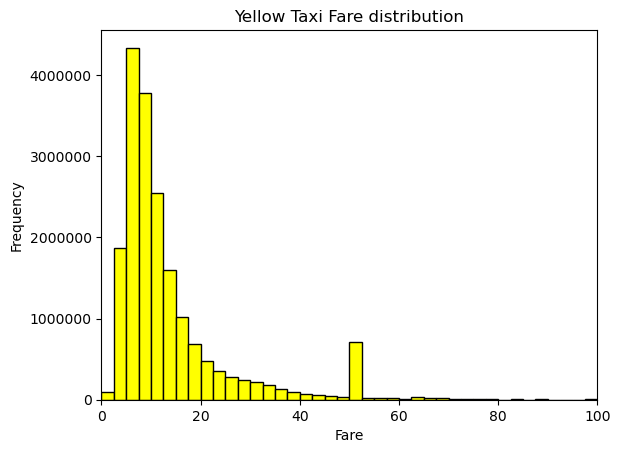

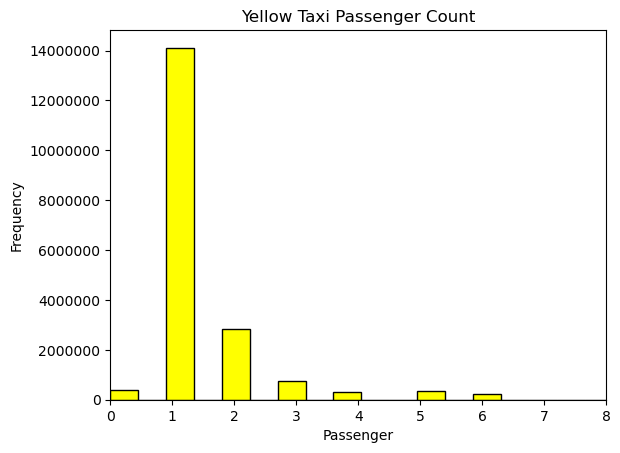

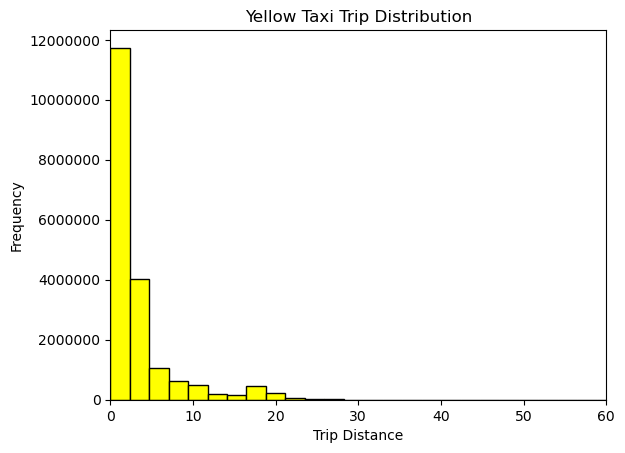

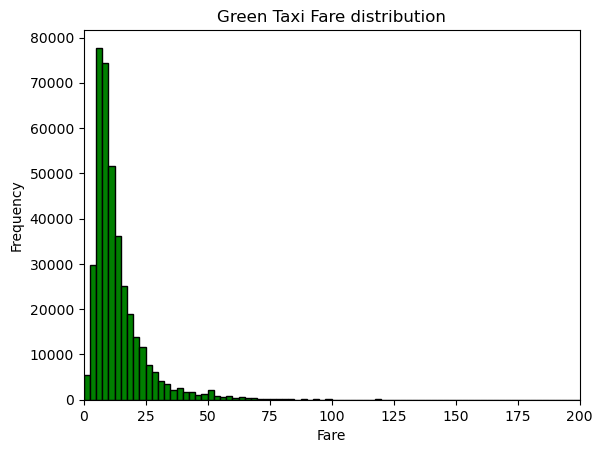

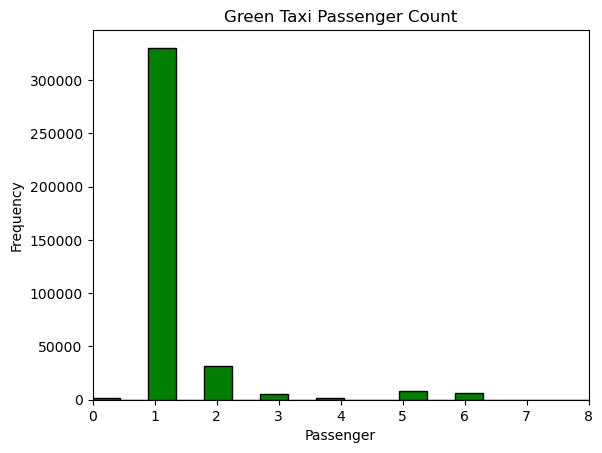

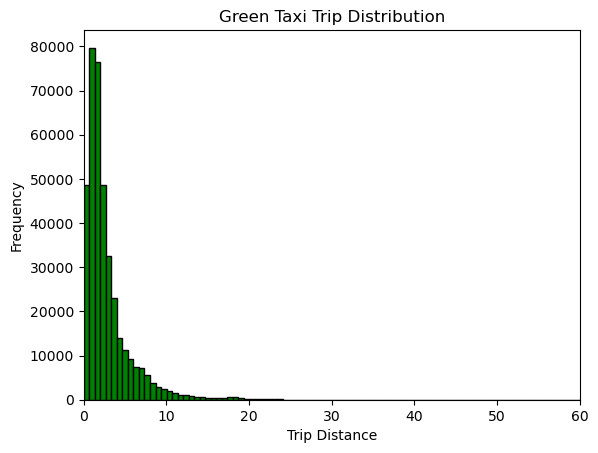

In [2]:
# Write your code
import matplotlib.pyplot as plt
import pandas as pd
from src.histogram import plot_histogram
from src.utils import create_scatterplot


#Yellow Taxis
#Firstly we will drop rows with na values: 
df_yellow = df_yellow.dropna()
#Excludes negativ fare amount + over 500 dollars
#Excludes trip distance over 500 miles
df_yellow = df_yellow_filtered = df_yellow[(df_yellow["fare_amount"]<=500) & (df_yellow["fare_amount"]>0) & (df_yellow["trip_distance"] <=500)]

#Plots distribution of fare amount with limit of 100 dollars
plt.subplot(1,1,1)
plot_histogram(df_yellow["fare_amount"], 
               bins = 200, 
               title = "Yellow Taxi Fare distribution", 
               xmin = 0, 
               xmax = 100, 
               xlabel = "Fare", 
               color = "yellow"
               )

#Plots distrubution of passenger count with limit of 
plt.subplot(1,1,1)
plot_histogram(df_yellow["passenger_count"], 
               bins = 20, 
               title = "Yellow Taxi Passenger Count", 
               xmin = 0, 
               xmax = 8, 
               xlabel = "Passenger", 
               color = "yellow"
               )

#Plots distrubution of trip distance with max x-value of 50 miles
plt.subplot(1,1,1)
plot_histogram(df_yellow["trip_distance"], 
               bins = 200, 
               title = "Yellow Taxi Trip Distribution", 
               xmin = 0, 
               xmax = 60, 
               xlabel = "Trip Distance", 
               color = "yellow"
               )



#Green Taxis
#Firstly we will drop the coloumn "ehail_fee" as these values are all None, and can cause problems: 
df_green = df_green.drop('ehail_fee', axis=1)
#Afterward we will drop na values: 
df_green = df_green.dropna()
df_green = df_green[(df_green["fare_amount"]<=500) & (df_green["fare_amount"]>0) & (df_green["trip_distance"] <=500)]

plot_histogram(df_green["fare_amount"], bins = 200, title = "Green Taxi Fare distribution", xmin = 0, xmax = 200, xlabel = "Fare", color = "green")

#Plots distrubution of passenger count with limit of 
plt.subplot(1,1,1)
plot_histogram(df_green["passenger_count"], 
               bins = 20, 
               title = "Green Taxi Passenger Count", 
               xmin = 0, 
               xmax = 8, 
               xlabel = "Passenger", 
               color = "green"
               )

#Plots distrubution of trip distance with max x-value of 50 miles
plt.subplot(1,1,1)
plot_histogram(df_green["trip_distance"], 
               bins = 200, 
               title = "Green Taxi Trip Distribution", 
               xmin = 0, 
               xmax = 60, 
               xlabel = "Trip Distance", 
               color = "green"
               )


### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [11]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


### Task 3: Explaination
The spatial maps has been made with kepler.gl. Since we couldn't find a way to make the map initialize the same way we made them, then the maps has been saved as a HTML, and can be opened through the webbrowser through the code block below. 
The maps are the following: 

**DO_Green.html** = The dropoff clusters of the green taxis

**PU_Green.html** = The pickup clusters of the green taxis

**DO_Yellow.html** = The dropoff clusters of the yellow taxis

**PU_Yellow.html** = the pickup clusters of the yellow taxis

Below this code block is also the rest of the code used to make data and the maps, but since the maps reinitialize each time they are run, then kepler will display an empty map. Please note that the yellow taxis has been limited to a sample of 100.000 because of memory limitations.

In [10]:
#Open the maps in webbrowser for interaction:
import webbrowser

# Specify the path to your saved Kepler map HTML file
html_path_DO_Yellow = 'DO_Yellow.html'
html_path_PU_Yellow = 'PU_Yellow.html'
html_path_DO_Green = 'DO_Green.html'
html_path_PU_Green = 'PU_Green.html'
# Open the HTML file in a new browser tab
webbrowser.open_new_tab(html_path_DO_Yellow)
webbrowser.open_new_tab(html_path_PU_Yellow)
webbrowser.open_new_tab(html_path_DO_Green)
webbrowser.open_new_tab(html_path_PU_Green)

True

In [ ]:
#Install nessecary packages if needed:
!pip install keplergl
!pip install pandas geopandas

In [3]:
# Write your code
import pandas as pd

#Yellow pickup:
df_yellow = pd.merge(
                               df_yellow, 
                               df_zones[['LocationID', 'lat', 'lng']], 
                               left_on='PULocationID', 
                               right_on='LocationID', 
                               how='left'
                               )
df_yellow = df_yellow.rename(columns={'lat': 'lat_PU','lng': 'lng_PU'})
df_yellow = df_yellow.drop("LocationID", axis = 1)


#Yellow dropoff: 
df_yellow = pd.merge(
                               df_yellow, 
                               df_zones[['LocationID', 'lat', 'lng']], 
                               left_on='DOLocationID', 
                               right_on='LocationID', 
                               how='left'
                               )
df_yellow = df_yellow.rename(columns={'lat': 'lat_DO', 'lng': 'lng_DO'})
df_yellow = df_yellow.drop("LocationID", axis = 1)
df_yellow = df_yellow.dropna()


#Green pickup:
df_green = pd.merge(
                               df_green, 
                               df_zones[['LocationID', 'lat', 'lng']], 
                               left_on='PULocationID', 
                               right_on='LocationID', 
                               how='left'
                               )
df_green = df_green.rename(columns={'lat': 'lat_PU','lng': 'lng_PU'})
df_green = df_green.drop("LocationID", axis = 1)


#Green dropoff: 
df_green = pd.merge(
                               df_green, 
                               df_zones[['LocationID', 'lat', 'lng']], 
                               left_on='DOLocationID', 
                               right_on='LocationID', 
                               how='left'
                               )
df_green = df_green.rename(columns={'lat': 'lat_DO', 'lng': 'lng_DO'})
df_green = df_green.drop("LocationID", axis = 1)
df_green = df_green.dropna()

In [ ]:
#Making yellow maps:
import geopandas as gpd
from keplergl import KeplerGl

#Yellow pickup:
Yellow_PU = KeplerGl(Height = 500)
Yellow_PU.add_data(data = df_yellow[['lat_PU', 'lng_PU', 'lat_DO', 'lng_DO']].sample(100000), name = "Yellow Taxi Pickup")
Yellow_PU

In [ ]:
#Yellow Dropoff
Yellow_DO = KeplerGl(Height = 500)
Yellow_DO.add_data(data = df_yellow[['lat_PU', 'lng_PU', 'lat_DO', 'lng_DO']].sample(100000), name = "Yellow Taxi Dropoff")
Yellow_DO

In [9]:
Yellow_PU.save_to_html(file_name='PU_Yellow.html')
Yellow_DO.save_to_html(file_name='DO_Yellow.html')

Map saved to DO_Yellow.html!


In [6]:
#Making green maps:
import geopandas as gpd
from keplergl import KeplerGl

#Green pickup:
Green_PU = KeplerGl(Height = 500)
Green_PU.add_data(data = df_green[['lat_PU', 'lng_PU', 'lat_DO', 'lng_DO']], name = "Green Taxi Pickup")
Green_PU

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Green Taxi Pickup': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1…

In [7]:
#Green pickup:
Green_DO = KeplerGl(Height = 500)
Green_DO.add_data(data = df_green[['lat_PU', 'lng_PU', 'lat_DO', 'lng_DO']], name = "Green Taxi Dropoff")
Green_DO

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Green Taxi Dropoff': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, …

In [8]:
Green_PU.save_to_html(file_name='PU_Green.html')
Green_DO.save_to_html(file_name='DO_Green.html')

Map saved to PU_Green.html!
Map saved to DO_Green.html!


In [10]:
#Open the maps in webbrowser for interaction:
import webbrowser

# Specify the path to your saved Kepler map HTML file
html_path_DO_Yellow = 'DO_Yellow.html'
html_path_PU_Yellow = 'PU_Yellow.html'

# Open the HTML file in a new browser tab
webbrowser.open_new_tab(html_path_DO_Yellow)
webbrowser.open_new_tab(html_path_PU_Yellow)

True

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

In [5]:
#Split date to use in analysis

#Imports custom function
from src.utils import split_date

#Makes new dataframes based on functions:
split_date(df_yellow, 'tpep_pickup_datetime')
split_date(df_green, 'lpep_pickup_datetime')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Hour,DayOfWeek,Month
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,...,0.0,None,0.3,4.80,2.0,1.0,0.00,0,Saturday,January
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,...,0.0,None,0.3,10.80,2.0,1.0,0.00,0,Saturday,January
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,...,0.0,None,0.3,23.15,1.0,1.0,2.75,0,Saturday,January
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,...,0.0,None,0.3,9.30,2.0,1.0,0.00,0,Saturday,January
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,...,0.0,None,0.3,31.26,1.0,1.0,2.75,0,Saturday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73713,2,2022-06-30 22:33:00,2022-06-30 22:46:00,None,NaN,74,169,NaN,2.86,18.66,...,0.0,None,0.3,21.26,NaN,NaN,NaN,22,Thursday,June
73714,2,2022-06-30 22:42:00,2022-06-30 23:00:00,None,NaN,25,14,NaN,6.84,24.16,...,0.0,None,0.3,30.37,NaN,NaN,NaN,22,Thursday,June
73715,2,2022-06-30 22:10:00,2022-06-30 22:55:00,None,NaN,106,137,NaN,8.47,32.69,...,0.0,None,0.3,40.71,NaN,NaN,NaN,22,Thursday,June
73716,2,2022-06-30 22:36:00,2022-06-30 23:03:00,None,NaN,181,36,NaN,4.67,23.55,...,0.0,None,0.3,29.61,NaN,NaN,NaN,22,Thursday,June


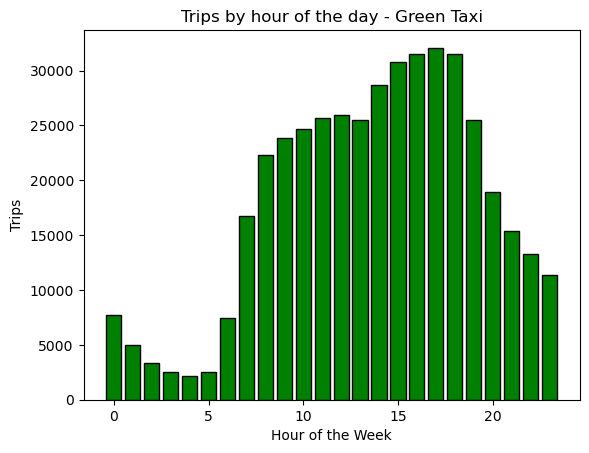

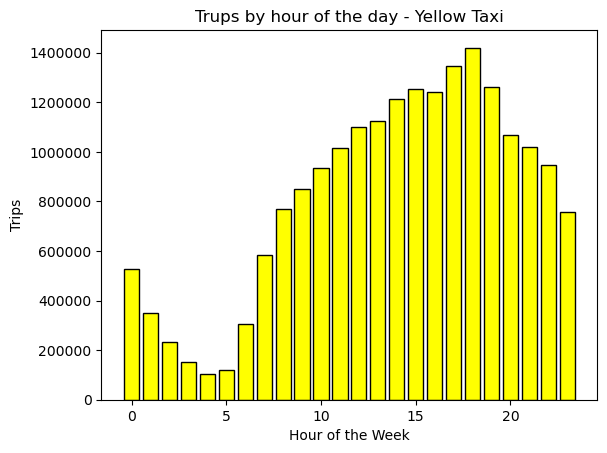

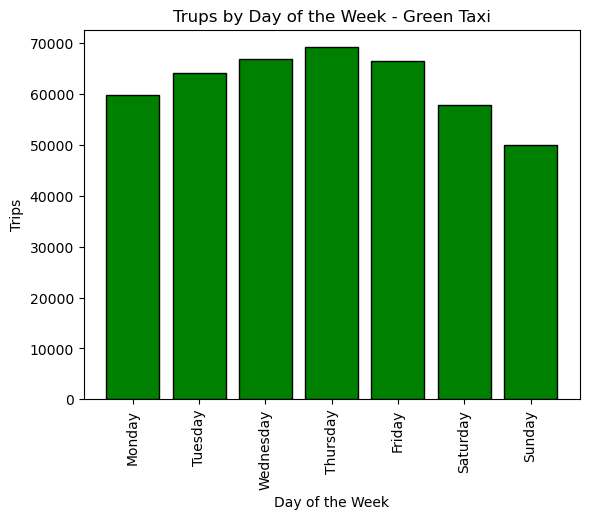

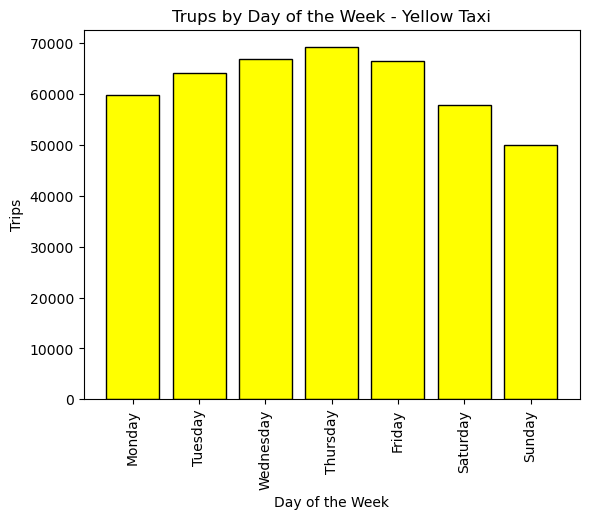

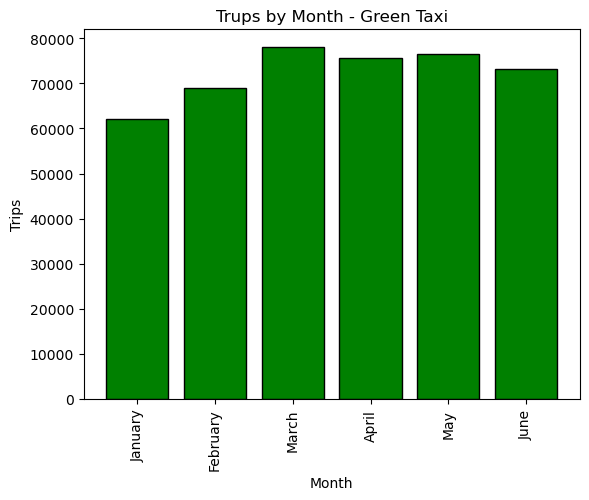

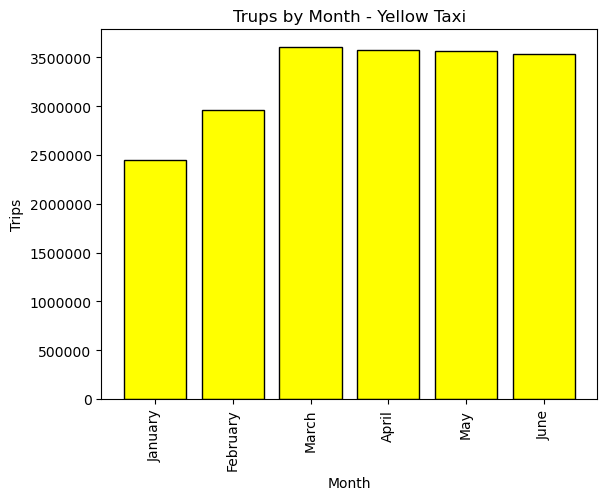

In [47]:
#Making visual representation of the temporal analysis
#from src.histogram import chronological orders of days and month. 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from src.utils import PlotBarChart
from src.utils import chronological_order_days
from src.utils import chronological_order_month

#Hour
#Green Taxi
counts_green_hour = df_green.groupby('Hour')['Hour'].count()
PlotBarChart(counts_green_hour, 
             'Trips by hour of the day - Green Taxi', 
             'Hour of the Week', 
             'Trips', 
             0, 
             'green')

#Yellow
counts_yellow_hour = df_yellow.groupby('Hour')['Hour'].count()
PlotBarChart(counts_yellow_hour, 
             'Trups by hour of the day - Yellow Taxi', 
             'Hour of the Week', 
             'Trips', 
             0, 
             'yellow')


#Day
#Green Taxi
counts = df_green.groupby('DayOfWeek')['DayOfWeek'].count()
sorted_counts = counts.loc[chronological_order_days]
PlotBarChart(sorted_counts, 
             'Trups by Day of the Week - Green Taxi', 
             'Day of the Week', 
             'Trips', 
             90, 
             'green')

#Yellow Taxi - Trips pr. day of the week
counts = df_yellow.groupby('DayOfWeek')['DayOfWeek'].count()
sorted_counts = counts.loc[chronological_order_days]
counts = df_green.groupby('DayOfWeek')['DayOfWeek'].count()
sorted_counts = counts.loc[chronological_order_days]
PlotBarChart(sorted_counts, 
             'Trups by Day of the Week - Yellow Taxi', 
             'Day of the Week', 
             'Trips', 
             90, 
             'yellow')

#Months
#Green Taxi
counts = df_green.groupby('Month')['Month'].count()
sorted_counts = counts.loc[chronological_order_month]
PlotBarChart(sorted_counts, 
             'Trups by Month - Green Taxi', 
             'Month', 
             'Trips', 
             90, 
             'green')
#Yellow
counts = df_yellow.groupby('Month')['Month'].count()
sorted_counts = counts.loc[chronological_order_month]
PlotBarChart(sorted_counts, 
             'Trups by Month - Yellow Taxi', 
             'Month', 
             'Trips', 
             90, 
             'yellow')


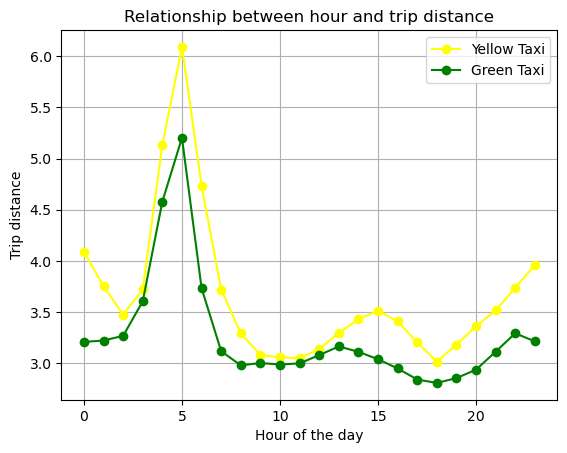

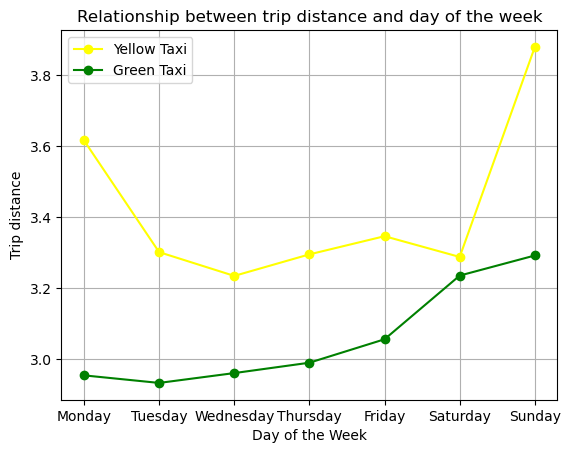

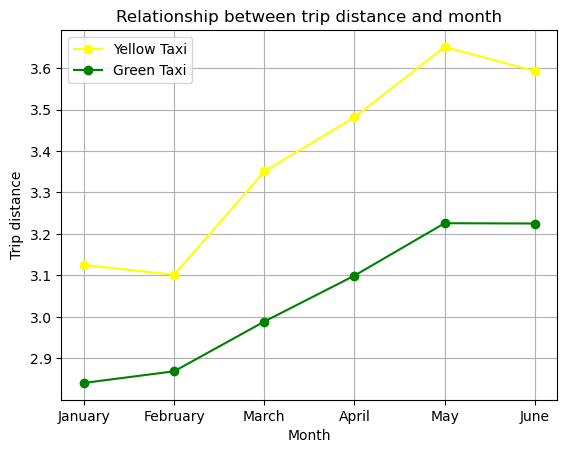

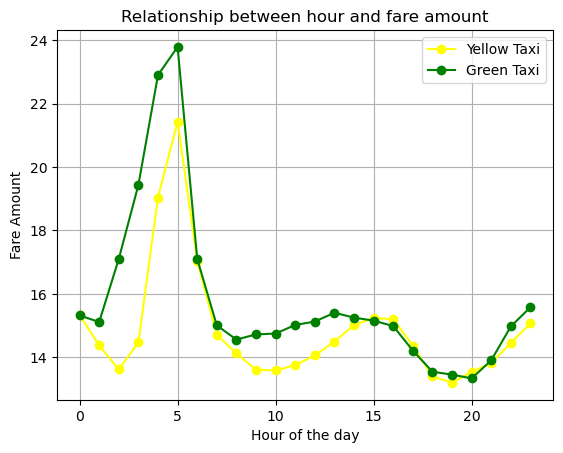

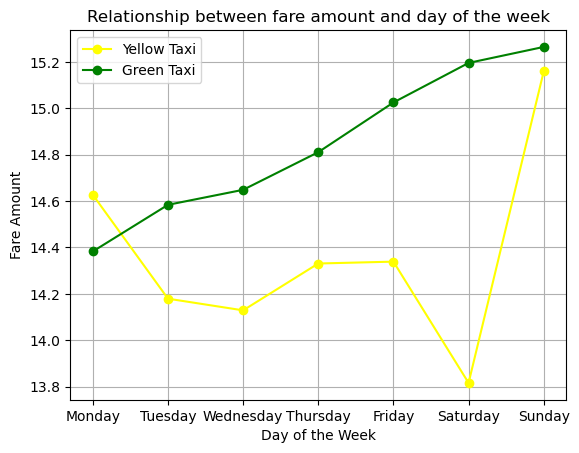

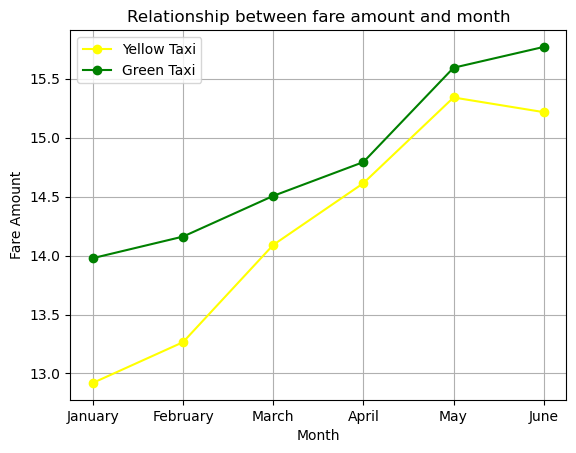

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import PlotTemporalRelationshipBoth
from src.utils import chronological_order_days
from src.utils import chronological_order_month

#Average distance by hour
average_distance_by_hour_yellow = df_yellow.groupby('Hour')['trip_distance'].mean()
average_distance_by_hour_green = df_green.groupby('Hour')['trip_distance'].mean()
PlotTemporalRelationshipBoth(average_distance_by_hour_yellow, 
                             average_distance_by_hour_green, 
                             'Yellow Taxi', 
                             'Green Taxi', 
                             'yellow', 
                             'green', 
                             'Hour of the day', 
                             'Trip distance', 
                             'Relationship between hour and trip distance'
                             )

#Average distance pr. day:
df_yellow_grouped_distance = df_yellow.groupby('DayOfWeek')['trip_distance'].mean()
df_yellow_grouped_distance = df_yellow_grouped_distance.reindex(chronological_order_days)
df_green_grouped_distance = df_green.groupby('DayOfWeek')['trip_distance'].mean()
df_green_grouped_distance = df_green_grouped_distance.reindex(chronological_order_days)
PlotTemporalRelationshipBoth(df_yellow_grouped_distance, 
                             df_green_grouped_distance, 
                             'Yellow Taxi', 
                             'Green Taxi', 
                             'yellow', 
                             'green', 
                             'Day of the Week', 
                             'Trip distance', 
                             'Relationship between trip distance and day of the week')

#Average distance pr. Month
df_yellow_grouped_distance = df_yellow.groupby('Month')['trip_distance'].mean()
df_yellow_grouped_distance = df_yellow_grouped_distance.reindex(chronological_order_month)
df_green_grouped_distance = df_green.groupby('Month')['trip_distance'].mean()
df_green_grouped_distance = df_green_grouped_distance.reindex(chronological_order_month)
PlotTemporalRelationshipBoth(df_yellow_grouped_distance, 
                             df_green_grouped_distance, 
                             'Yellow Taxi', 
                             'Green Taxi', 
                             'yellow', 
                             'green', 
                             'Month', 
                             'Trip distance', 
                             'Relationship between trip distance and month')


# Average fare pr. hour
average_fare_by_hour_yellow = df_yellow.groupby('Hour')['fare_amount'].mean()
average_fare_by_hour_green = df_green.groupby('Hour')['fare_amount'].mean()
PlotTemporalRelationshipBoth(average_fare_by_hour_yellow, 
                             average_fare_by_hour_green, 
                             'Yellow Taxi', 
                             'Green Taxi', 
                             'yellow', 
                             'green', 
                             'Hour of the day', 
                             'Fare Amount', 
                             'Relationship between hour and fare amount'
                             )

# Fare amount and day of the week
df_yellow_grouped = df_yellow.groupby('DayOfWeek')['fare_amount'].mean()
df_yellow_grouped = df_yellow_grouped.reindex(chronological_order_days)
df_green_grouped = df_green.groupby('DayOfWeek')['fare_amount'].mean()
df_green_grouped = df_green_grouped.reindex(chronological_order_days)
PlotTemporalRelationshipBoth(df_yellow_grouped, 
                             df_green_grouped, 
                             'Yellow Taxi', 
                             'Green Taxi', 
                             'yellow', 
                             'green', 
                             'Day of the Week', 
                             'Fare Amount', 
                             'Relationship between fare amount and day of the week')

df_yellow_grouped = df_yellow.groupby('Month')['fare_amount'].mean()
df_yellow_grouped = df_yellow_grouped.reindex(chronological_order_month)
df_green_grouped = df_green.groupby('Month')['fare_amount'].mean()
df_green_grouped = df_green_grouped.reindex(chronological_order_month)
PlotTemporalRelationshipBoth(df_yellow_grouped, 
                             df_green_grouped, 
                             'Yellow Taxi', 
                             'Green Taxi', 
                             'yellow', 
                             'green', 
                             'Month', 
                             'Fare Amount', 
                             'Relationship between fare amount and month')


### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [31]:
from prophet import Prophet
import pandas as pd

#Orginazing the dataframes for modelling:
# Load the dataframe with pickup dates
df_trips_yellow = df_yellow[['tpep_pickup_datetime']].copy()
df_trips_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_trips_yellow['tpep_pickup_datetime']).dt.date

# Count the number of trips per date and excluding dates that are not from 2022:
df_trips_yellow = df_trips_yellow.groupby('tpep_pickup_datetime').size().reset_index(name='num_trips')
df_trips_yellow = df_trips_yellow[
    pd.to_datetime(df_trips_yellow['tpep_pickup_datetime']).dt.year == 2022
                                ].reset_index(drop = True)
#Renaming columns to prophet standard: 
df_trips_yellow = df_trips_yellow.rename(columns={'tpep_pickup_datetime': 'ds',
                                'num_trips': 'y'
                                })

10:16:48 - cmdstanpy - INFO - Chain [1] start processing
10:16:48 - cmdstanpy - INFO - Chain [1] done processing


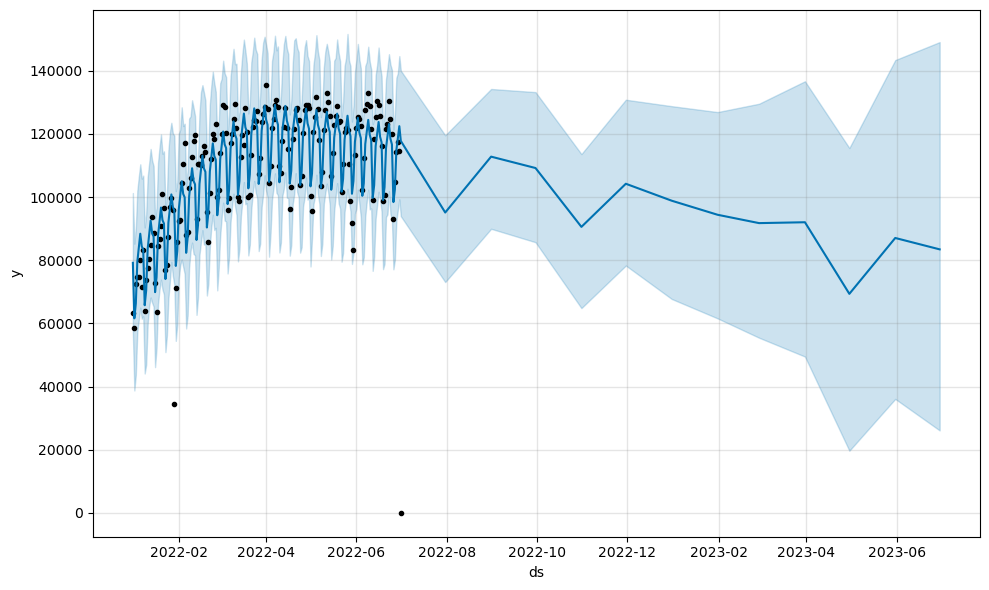

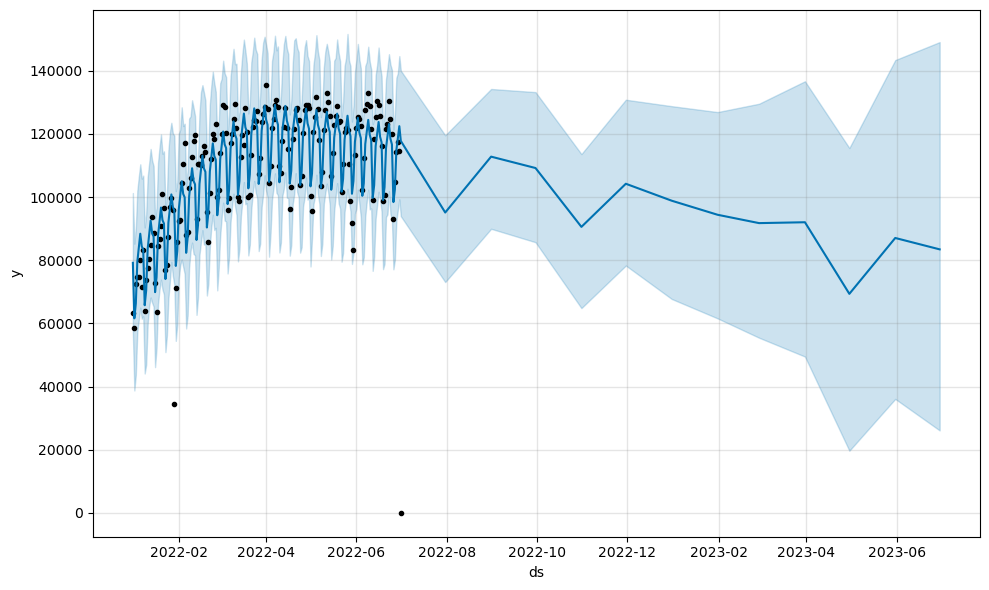

In [32]:
my_model = Prophet(interval_width= 0.95)

my_model.fit(df_trips_yellow)

future_dates = my_model.make_future_dataframe(periods = 12, freq = 'M', include_history=True)

future_dates
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

my_model.plot(forecast, uncertainty = True)

### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.